# Exercise Ten: Mapping, Twitter Style - Complete

If you have an approved Twitter account, refer to last week's demo for help importing tweets. This demo assumed you haven't received approval, and works from an imported spreadsheet generated using TAGs.

Your application should:

- Import or collect tweets using a keyword or hashtag. Watch your rate limiting!
- Use Pandas to sort and analyze your tweets. 
- Calculate user coordinates, where feasible, for the set of collected tweets. Again, watch your rate limiting!
- Map the tweets using the calculated locations.
- Use at least one data visualization from a previous exercise, demo, or the course text to analyze a different element of your tweets.

As a bonus challenge, try to map some other quality of your data. For instance, you might only map the locations where a certain word or hashtag is used, or try to visualize the quantity of tweets that share a location using a larger radius dot.

In an effort to capture the geographical size of the conversation surrounding the recent state level elections in Virginia, I did a TAGS scrape of #Virginia.  I imported the scrape as a csv file and ran it through the workflow. Once plotted on the map, I was surprised to see how global a state level election may be.  Granted, this hashtag may have captured non-election tweets.  If I were to process this further, I would compile all Virginia state election related hashtags and run them through.  

In [5]:
import pandas as pd

df = pd.read_csv('virginia.csv')
print(df.dtypes)


id_str                       float64
from_user                     object
text                          object
created_at                    object
time                          object
geo_coordinates               object
user_lang                    float64
in_reply_to_user_id_str      float64
in_reply_to_screen_name       object
from_user_id_str             float64
in_reply_to_status_id_str    float64
source                        object
profile_image_url             object
user_followers_count         float64
user_friends_count           float64
user_location                 object
status_url                    object
entities_str                  object
dtype: object


In [6]:
tdf = df[['from_user', 'user_location','text']]
print(tdf)

            from_user                user_location  \
0          DaniEngel6  😉manches ist überzeichnet😉    
1     Travell51097360                 Red Virginia   
2           rotovisor                       Italia   
3     FairyLeoMelvine    🎪   ✦   𝗲𝘅𝗼.   ば   ⸙   𓂃    
4           robin5362                   Warren, OH   
...               ...                          ...   
2962       alohaberni                          NaN   
2963    BeytienJoshua                Dubuque, Iowa   
2964          Fan4Cal                          NaN   
2965  Showwhatishidde                          NaN   
2966              NaN                          NaN   

                                                   text  
0     Die gute Nachricht..\nSie ist eine Farbige..😃👍...  
1     @washingtonpost Democrats learned nothing from...  
2     Insomma è contenta di avere perso in #Virginia...  
3     RT @opsviralizou: O que vocês acharam? #Virgin...  
4     RT @DavidCornDC: For many #Virginia voters, it...  
...

In [7]:
locs = tdf['user_location'].value_counts()
print(locs)

United States                   93
Washington, DC                  42
USA                             33
Virginia                        22
Virginia, USA                   21
                                ..
Que te importa!!!!               1
Florida (Treasure Coast) USA     1
Florianópolis, Brasil            1
Buenos Aires, Argentina          1
Deutschland                      1
Name: user_location, Length: 1053, dtype: int64


In [8]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

geolocator = Nominatim(user_agent='twitter-analysis-client')
limited = RateLimiter(geolocator.geocode, min_delay_seconds=.5)

def find_location(row):
    place = row['user_location']
    location = limited(place)
    
    if location != None:
        return location.latitude, location.longitude
    else:
        return "Not Found", "Not Found"

tdf[['latitude','longitude']] = tdf.apply(find_location, axis="columns", result_type="expand")
tdf


RateLimiter caught an error, retrying (0/2 tries). Called with (*('America (the Land of the Free)',), **{}).
Traceback (most recent call last):
  File "C:\Users\Stoddard\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "C:\Users\Stoddard\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "C:\Users\Stoddard\anaconda3\lib\http\client.py", line 1332, in getresponse
    response.begin()
  File "C:\Users\Stoddard\anaconda3\lib\http\client.py", line 303, in begin
    version, status, reason = self._read_status()
  File "C:\Users\Stoddard\anaconda3\lib\http\client.py", line 264, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "C:\Users\Stoddard\anaconda3\lib\socket.py", line 669, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\Stoddard\anaconda3\lib\ssl.

,from_user,user_location,text,latitude,longitude
0,DaniEngel6,😉manches ist überzeichnet😉,Die gute Nachricht..\nSie ist eine Farbige..😃👍...,Not Found,Not Found
1,Travell51097360,Red Virginia,@washingtonpost Democrats learned nothing from...,36.7441,-78.0694
2,rotovisor,Italia,Insomma è contenta di avere perso in #Virginia...,42.6384,12.6743
3,FairyLeoMelvine,🎪 ✦ 𝗲𝘅𝗼. ば ⸙ 𓂃,RT @opsviralizou: O que vocês acharam? #Virgin...,44.3053,17.5961
4,robin5362,"Warren, OH","RT @DavidCornDC: For many #Virginia voters, it...",41.2376,-80.8184
...,...,...,...,...,...
2962,alohaberni,NaN,RT @ZadeSmith6: Congrats #Virginia ! BUT we ha...,46.3145,11.048
2963,BeytienJoshua,"Dubuque, Iowa",Credit: Ed Wilkommen\n\n#1950s #50s #vintage #...,42.5006,-90.6648
2964,Fan4Cal,NaN,RT @RitaCosby: Don’t miss this fun conversatio...,46.3145,11.048
2965,Showwhatishidde,NaN,RT @Repelsteeltje21: Wie wil weten waarom de #...,46.3145,11.048


In [9]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plt.rcParams.update({'font.size': 20})
plt.rcParams['figure.figsize'] = (20, 10)

In [10]:
tdf = tdf[tdf['latitude'] != 'Not Found']
tdf = tdf[tdf['longitude'] != 'Not Found']

lats = tdf['latitude']
longs = tdf['longitude']

print(lats)
print(longs)
# Ths generates a nonsequential index, which will creat a problem.  This is because the not foundswere removed, but previous indexes were kept.  Good, but not what we need.


1       36.7441
2       42.6384
3       44.3053
4       41.2376
5       46.3145
         ...   
2962    46.3145
2963    42.5006
2964    46.3145
2965    46.3145
2966    46.3145
Name: latitude, Length: 2670, dtype: object
1      -78.0694
2       12.6743
3       17.5961
4      -80.8184
5        11.048
         ...   
2962     11.048
2963   -90.6648
2964     11.048
2965     11.048
2966     11.048
Name: longitude, Length: 2670, dtype: object


In [11]:
# This re indexes the data into a useable sequence
lats.index=range(0,len(lats))
longs.index=range(0,len(longs))

print(lats)

0       36.7441
1       42.6384
2       44.3053
3       41.2376
4       46.3145
         ...   
2665    46.3145
2666    42.5006
2667    46.3145
2668    46.3145
2669    46.3145
Name: latitude, Length: 2670, dtype: object


C:\Users\Stoddard\anaconda3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


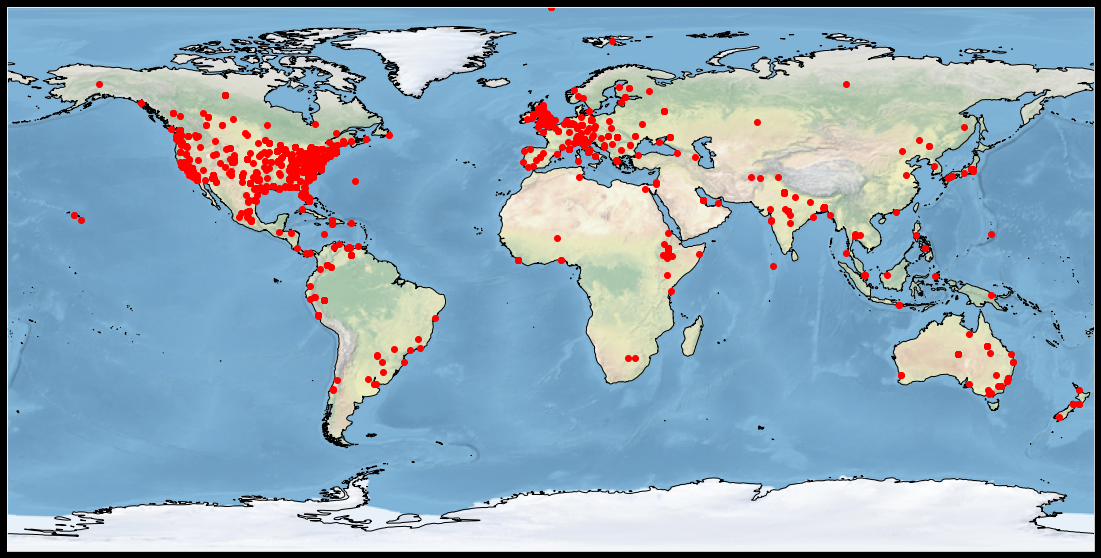

In [12]:
import cartopy.crs as ccrs
from matplotlib.patches import Circle

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
    
for i in range(0, len(lats)):
    ax.plot(longs[i], lats[i], 'ro', transform=ccrs.PlateCarree())
                                                                                    
ax.coastlines(resolution='50m')
ax.set_global()

plt.show()


In [13]:
# Creating density radius
counter = tdf.groupby(['latitude','longitude']).size().reset_index().rename(columns={0:'count'})

print(counter)

      latitude   longitude  count
0   -45.725555  168.293681      1
1   -41.500083  172.834408      1
2   -41.325294  174.787281      1
3   -41.289636  174.775772      2
4   -37.947609  145.171667      1
..         ...         ...    ...
611  63.246778   25.920916      1
612  63.682011   22.712378      1
613  64.445961 -149.680909      1
614  64.686314   97.745306      1
615  90.000000    0.000000      5

[616 rows x 3 columns]


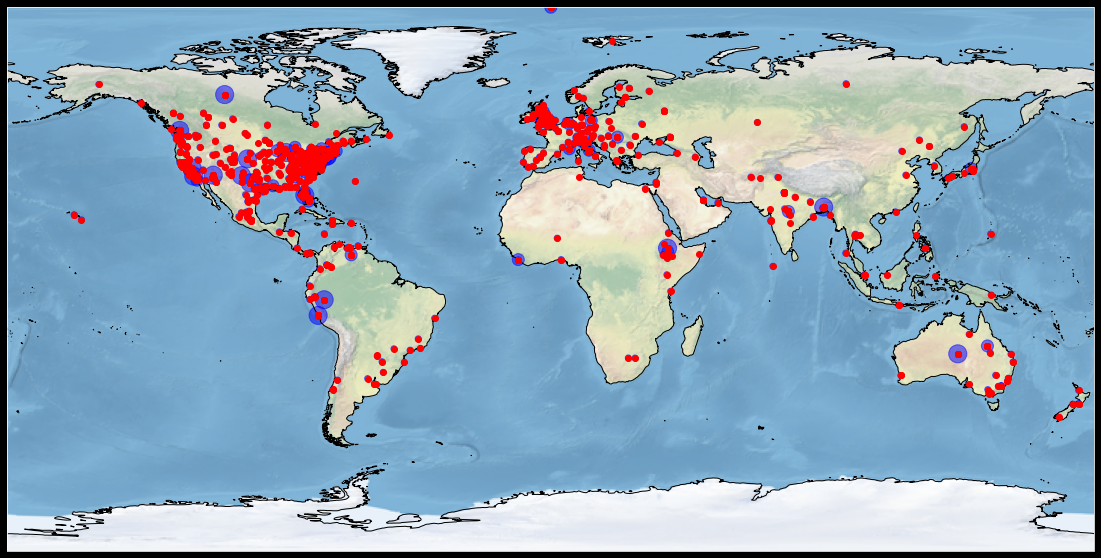

In [14]:
# Plotting density
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
                                                                                                      
for i in range(0, len(lats)):
    ax.plot(longs[i], lats[i], 'ro', transform=ccrs.PlateCarree())
                           
                                                                                                
ax.coastlines(resolution='50m')
ax.set_global()
def get_radius(freq):
    if freq < 5:
        return 1
    elif freq < 10:
        return 2
    elif freq >= 10:
        return 3


colLats = counter['latitude']
colLongs = counter['longitude']
colCounts = counter['count']

for i in range(0, len(counter)):
    ax.add_patch(Circle(xy=[colLongs[i], colLats[i]], radius=get_radius(colCounts[i]), color='blue',alpha=0.5, transform=ccrs.PlateCarree()))

plt.show()